# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

In [80]:
# Calculate mean and std of medical charges (DDOF = 1 since we want to make sure the sample is an
# unbiased measurement of the entire hospital population)
charges_mean = np.mean(list(medical.charges))
charges_std = np.std(list(medical.charges), ddof=1)

print("Mean Charge:", charges_mean)
print("Standard Deviation:", charges_std)

Mean Charge: 13270.422265141257
Standard Deviation: 12110.011236694001


__A:__ The mean of these statistics can be deceiving in the sense that it is hiding what we are trying to explore. We want to explore if people with insurance are being charged differently than those without. However, if we only take the mean of the charges for all patients, we cannot see how the charges are distributed. This is why the standard deviation is helpful in this case. The standard deviation helps us see that there is a pretty significant spread among the data for the charges. The standard deviation is almost as large as the mean, which shows that there is a significant difference among the charges for patients. This is interesting and deserves further explanation.

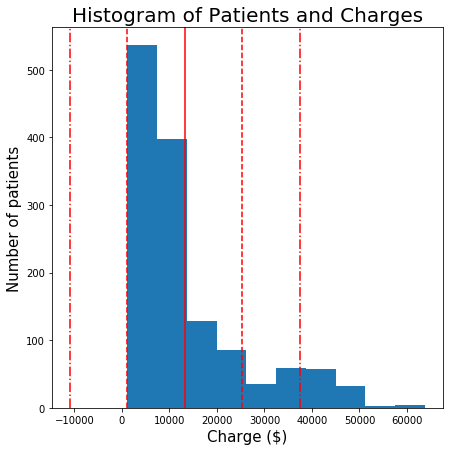

In [52]:
plt.figure(figsize=(7,7))

# Plot histogram
plt.hist(medical.charges)

# Set title
plt.title("Histogram of Patients and Charges", fontsize=20)

# Set x and y labels
plt.xlabel("Charge ($)", fontsize=15)
plt.ylabel("Number of patients", fontsize=15)

# Set lines for mean and standard deviations
plt.axvline(charges_mean, color='r')
_ = plt.axvline(charges_mean + charges_std, color='r', linestyle='--')
_ = plt.axvline(charges_mean - charges_std, color='r', linestyle='--')
_ = plt.axvline(charges_mean + charges_std*2, color='r', linestyle='-.')
_ = plt.axvline(charges_mean - charges_std*2, color='r', linestyle='-.')

plt.show()

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ To answer the first part of the question, it is important to first note the sample size of the data. The number of patients in this data is 1338. According to the Central Limit Theorem, a sample size of ≥ 30 will produce a normally distributed sample distribution of the mean. 1338 is greater than 30, so this first point is supported. The assumption that the data represents a random sample of charges is also important because it allows us to assume that our sample will fairly represent the actual populatin distribution of patients.

Because our sample size is large, the Central Limit Theorem allows us to believe that this sample we have would come from a normally distributed sample distribution of means. As a result, we can use our sample to approximate a mean and standard deviation for this sample distribution and essentially use this to construct a confidence interval in which we are strongly confident that the actual average charge (the population parameter in question) is contained in. 

Even though our sample size is large, we do not know the standard deviation of the population, so we should use a t-test to see if the actual average charge has actually fallen below 12000.

$H_{0}$ = average charge is above 12000<br>
$H_{a}$ = average charge has fallen below 12000

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ Since we are concerned with only if the average charge has fallen below 12000, the appropriate confidence interval in this case would be a one-sided interval. We do not care how much *above* 12000 the average charge is, so we will only examine the inveral in one direction.

In [60]:
# One-sided confidence interval conept reference: https://www.graphpad.com/guides/prism/7/statistics/one_sided_confidence_intervals.htm?toc=0&printWindow

# Degrees of Freedom for calculating
dof = len(medical.charges) - 1

# Calculate critical t-value for one-sided t-test
# (alpha=0.05 because we are calculating a 90% confidence interval that results with 5% on each side. 
# I only care about the lower side, which leave 95% on the other side as the upper limit of the interval)
critical_t = t.ppf(1-.05, df=dof)
print("Critical t-value:", critical_t)

Critical t-value: 1.6459941145571317


In [87]:
# Calculate margin of error
t_moe = critical_t * (charges_std/np.sqrt(len(medical.charges)))
print("Margin of Error:", t_moe)

Margin of Error: 544.9350813250254


In [88]:
# Calculate 95% confidence interval of the mean
t_confidence_interval = np.array([charges_mean - t_moe, '∞'])
print("95% Confidence Interval:", "(" + str(t_confidence_interval[0]), ",", str(t_confidence_interval[1]) + ")")

95% Confidence Interval: (12725.48718381623 , ∞)


__A:__ Since we are 95% confidence that the average charge is *at least* 12725.59, the administrator does not have to be concerned.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

**Note**:<br>
n = sample size<br>
s = standard deviation<br>
x = mean

__A:__ <br>
$H_{0}$ = People with insurance are charged the same as those without insurance<br>
$H_{a}$ = People with insurance are actually charged a different amount to those without insurance<br>

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [110]:
# Split medical table into two separate groups of charges: insurance 'ins' and no insurance 'no_ins'
ins = medical[medical.insuranceclaim == 1].charges
no_ins = medical[medical.insuranceclaim == 0].charges

# Get sample sizes for patients with and without insurance
ins_n = len(ins)
no_ins_n = len(no_ins)

# Get average charge for patients with and without insurance
ins_avg = np.mean(ins)
no_ins_avg = np.mean(no_ins)

# Get standard deviations for patients with and without insurance
ins_std = np.std(ins)
no_ins_std = np.std(no_ins)

# Calculate pooled std of the two groups
pooled_std = np.sqrt((((ins_n - 1)*(ins_std**2)) + ((no_ins_n - 1)*(no_ins_std**2))) / (ins_n + no_ins_n - 2))

# Calculate t-test statistic
t_stat = (ins_avg - no_ins_avg) / (pooled_std * np.sqrt((1/ins_n) + (1/no_ins_n)))
print("Manual t-test statistic:", t_stat)
print("Manual Probability:", t.sf(t_stat, ins_n+no_ins_n-2)*2)

# Calculate using stats.ttest_ind(mean_1, mean_2)
function_t, function_p = stats.ttest_ind(ins, no_ins)
print("Function calculated t-statistic:", function_t)
print("Function calculated p-value:", function_p)

Manual t-test statistic: 11.901306943555385
Manual Probability: 4.090550214373795e-31
Function calculated t-statistic: 11.893299030876712
Function calculated p-value: 4.461230231620717e-31


__A:__ Since the p-value is very small for the t-statistic that we calculated, we reject the null hypothesis that people with insurance are charged the same as those without.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [111]:
# Calculate using stats.ttest_ind, while also telling it to not assume equal variances
function_t, function_p = stats.ttest_ind(ins, no_ins, equal_var=False)
print("Function calculated t-statistic:", function_t)
print("Function calculated p-value:", function_p)

Function calculated t-statistic: 13.298031957975649
Function calculated p-value: 1.1105103216309125e-37


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ scipy.stats.zscore


## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test